## Perceptron Logical Gates

In this notebook we train a perceptron (just a single neuron) to solve logical gates. 

That means, e.g. for the AND gate, if we put in a 0 and a 1, the perceptron should output 0. It should only output 1 if the input was (1,1).

For the XOR gate, the Perceptron should return 1 if only one of the inputs was 1 and the other one 0 -->  (0,1) or (1,0). For (0,0) and (1,1) it should return 0.

And so on...

In [1]:
# Not using any tf libraries so far...
import numpy as np 
import math

In [2]:
# To make sure that you get the implementation right let us first have a look at the data structure.
# These are the four possible input pairs of (x1,x2).
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
# These are possible labels form some logical gates.
t_and = np.array([0,0,0,1])#using and, all are false, 0, but one of them
t_or = np.array([0,1,1,1])# using or, all of them are true ,1, but one of them
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

#### Implement Perceptron.

In [3]:
# To make you familiar with classes we will implement the perceptron as a class.
# Check https://docs.python.org/3/tutorial/classes.html if you need basic help with python classes.

class Perceptron:
    
    def __init__(self, input_units):
        self.input_units = input_units
        self.sigmoid=0
        # 1. Initialize random weights and a random bias term. Check 'np.random.randn()'.
        self.weights = np.random.randn(input_units)
        

        self.bias = np.random.randn() #it's a bias per neuron,thus we only need one, this is the code for a percetron
        # 2. Define the learning rate as 0.01.
        self.alpha = 1
        
    def forward_step(self, input):
        # Perform a perceptron forward step.
        # 1. Calculate the drive. You can use @ as a matrix multiplication command.
        weighted_sum =  self.weights @ input + self.bias 
        print(weighted_sum)
        #implementing sigmoid as an activation function.
        self.sigmoid=1/(1+math.exp(-weighted_sum))
        
        return self.sigmoid
        
        """"
        # 2. Return a 1 or a 0, depending on whether the perceptron surpassed the threshold. 
        # You can use 'int(...)' to make an integer out of a boolean.
        #the inputs of the neuron would be the activations in the l-1 layer of that neuron
        self.input_activation= input
        return int(weighted_sum >= 0)
        """
    def sigmoid_prime(self):
        derivative_sigmoid=self.sigmoid*(1-self.sigmoid)
        return derivative_sigmoid
    
    def update(self,delta,activation):
        #compute the error (which is just a scalar) times all the activations, which is 
        #a vector.are the activations in the layer l-1 just the inputs of the 
        #perceptron???
        #RECALL! every layer perceptron has as many weights as activations the previous
        #layer has
        print('hi')
        print(activation)
        print(delta)
      
        gradient_weights= delta*activation
        new_weights= self.weights-(self.alpha*gradient_weights)
        #update weights
        self.weights=new_weights
    
    
    def training_step(self, input, label):
        # Perform a whole training step (including the forward step).
        # 1. Forward step.
        prediction = self.forward_step(input)
        # 2. Calculate the weight updates.
        delta_weights = self.alpha * (label - prediction) * input
        # 3. Calculate the bias update. We consider 1 as the "input" to the bias, so that we can treat it just like the other weights.
        delta_bias = self.alpha * (label - prediction) * 1
        # 4. Update weights and bias.
        self.weights += delta_weights
        self.bias += delta_bias


In [75]:
#DON'T PAY ATTENTION TO THIS
weighted_sum=4
empty_a= np.array([])
for i in range(3):
    empty_a=np.append(empty_a,Perceptron(2))
sigmoid=1/(1+math.exp(-weighted_sum))
derivative_sigmoid=sigmoid*(1-sigmoid)
print(sigmoid)
print(derivative_sigmoid)

0.9820137900379085
0.017662706213291107


In [64]:
#DON'T PAY ATTENTION TO THIS
for j in range(3):
    print(empty_a[j].weights)

[ 1.12243375 -1.58766422]
[0.72325381 0.15081959]
[-0.85217053 -0.28496953]


In [5]:
class MLP:
    def __init__(self, hidden_layer, num_perceptrons,input):
        #FOWARD IMPLIMENTATION
        #label takes in the desired output for some specific input
    
        #self.label=label
        self.input=input
        self.hidden_layer=hidden_layer
        self.num_perceptrons=num_perceptrons
        #we need 8 weights, since I have 2 inputs and 4 perceptrons, I have to call forward_step
        #4 times, so that I can compute the the activation for each perceptron
        #this array stores the activation of the neurons
        self.activation=np.array([])
        #this array stores the weights for each neuron
        self.weights_per_percep=np.array([])
        #this loop creates as many Perceptron objects as needed, and they're stored in
        #weights_per_percep. These are all the perceptrons of the hidden layer
        for j in range(4):
            #remember that the number Perceptron(2) pass to the Perceptron class
            #indicates the numbers of weights each perceptron needs
            self.weights_per_percep=np.append(self.weights_per_percep,Perceptron(2))
        #this loop takes each object from the weights_per_percep array, and calls the
        #function foward_step
        for i in range(4):
            #calculate the activations for each perceptron 
            self.activation=np.append(self.activation,self.weights_per_percep[i].forward_step(input))
        print(self.activation)
        #I am using this len(activation), because for the output layer I need as many 
        #weights as activations the previus layer had. 
        #output_perceptron_weights is the last perceptron, and as such it is an object
        self.output_perceptron_weights=Perceptron(len(self.activation))
        self.activation_output_percep= self.output_perceptron_weights.forward_step(self.activation)
        print(self.activation_output_percep)
    def foward_mlp(input_foward):
        for i in rage(len(self.weights_per_percep)):
            self.weights_per_percep.forward_step(input_foward)

   
    def backprop_step(self,labels,inputs):
        print(self.activation)
        #to compute delta you need the derivative of the sigmoid, this one must be
        #calculated in Peceptron class function foward_step, since that function has
        #access to the net input needed to compute the derivative of the sigmoid
        delta_output_layer=(labels - self.activation_output_percep)*self.output_perceptron_weights.sigmoid_prime()
        print(delta_output_layer)
        #pass the error to the update function, the function has to be called on the object
        #output_perceptron_weights, because I want to update the weights that belong to that
        #specific object.
        self.output_perceptron_weights.update(delta_output_layer,self.activation)
        
        #this code below computes the error for the perceptrons in the hidden layer
        
        for j in range(len( self.weights_per_percep)):
            perceptron_weight=self.weights_per_percep[j].weights[j]
            print('this is the perceptron weight: '+str(perceptron_weight))
            derivative=self.weights_per_percep[j].sigmoid_prime()
            print(derivative)
            delta_hidden_layer=delta_output_layer*perceptron_weight*derivative
            print('this is the error of the hidden layer'+str(delta_hidden_layer))
            self.weights_per_percep[j].update(delta_hidden_layer,inputs)

 

In [6]:
input_test=np.array([4,5])
t=MLP(1,1,input_test)
#t.backprop_step([[1]],input_test)

1.9146862273385623
3.5103717823961147
0.8609235369208714
-3.2065946268032977
[0.87154471 0.97098144 0.70285357 0.03891831]
1.5894942886707097
0.8305449411292797


In [ ]:
#x = np.array([[0,0],[0,1],[1,0],[1,1]])
# Now let's train the perceptron.

# Choose which target you want to train on.
t = t_and
# Initialize a perceptron. A new object is created using the clas Perceptron
multilayer = MLP(1,1,)
# Initialize lists to store steps and performance.
steps = []
accuracies = []

# We train for 500 steps.
for i in range(500):
    steps.append(i)
    
    # 1. Draw a random sample from x and the corresponding t. Check 'np.random.randint'.
    index = np.random.randint(len(x))
    #the index of the sample is the same as the index of the labeel. 
    sample = x[index]
    label = t[index]
    # 2. Perform a training step.
    perceptron.training_step(sample, label)
    
    # Calculate the performance over all four possible inputs.
    accuracy_sum = 0
    for k in range(len(x)):
        #bear in mind that the forward_step function runs with the newly updated weigths
        #that's why it makes to calculate the accuracy. So we're taking all the 
        #possible inputs, and then we make predictions with these newly updated weights
        output = perceptron.forward_step(x[k])   # feed each input to the perceptron (only foward step!)
        accuracy_sum += int(output == t[k])  # this turns true if the perceptron gave the right output --> then adds 1 
    accuracy = accuracy_sum / 4                  # we divide through all the training examples
    accuracies.append(accuracy)

Note that we are **adding** the weights/biases, because we are using the Perceptron Learning rule and **not Gradient Descent**!

#### Perceptron Learning Rule Recap:
$$w_i^{new} = w_i^{old} + \Delta w_i  $$
$$\Delta w_i = \alpha*  (t-y) *x_i $$

#### Train on AND gate.

In [18]:
#x = np.array([[0,0],[0,1],[1,0],[1,1]])
# Now let's train the perceptron.

# Choose which target you want to train on.
t = t_and
# Initialize a perceptron. A new object is created using the clas Perceptron
perceptron = Perceptron(2)
# Initialize lists to store steps and performance.
steps = []
accuracies = []

# We train for 500 steps.
for i in range(500):
    steps.append(i)
    
    # 1. Draw a random sample from x and the corresponding t. Check 'np.random.randint'.
    index = np.random.randint(len(x))
    #the index of the sample is the same as the index of the labeel. 
    sample = x[index]
    label = t[index]
    # 2. Perform a training step.
    perceptron.training_step(sample, label)
    
    # Calculate the performance over all four possible inputs.
    accuracy_sum = 0
    for k in range(len(x)):
        #bear in mind that the forward_step function runs with the newly updated weigths
        #that's why it makes to calculate the accuracy. So we're taking all the 
        #possible inputs, and then we make predictions with these newly updated weights
        output = perceptron.forward_step(x[k])   # feed each input to the perceptron (only foward step!)
        accuracy_sum += int(output == t[k])  # this turns true if the perceptron gave the right output --> then adds 1 
    accuracy = accuracy_sum / 4                  # we divide through all the training examples
    accuracies.append(accuracy)

#### Let's give it a try:


In [19]:
for n in range(len(x)):
  output = perceptron.forward_step(x[n])
  print("Input: %s \t True Label: %d \t Perceptron's Prediction: %d" % (np.array2string(x[n]), t[n], output))


Input: [0 0] 	 True Label: 0 	 Perceptron's Prediction: 0
Input: [0 1] 	 True Label: 0 	 Perceptron's Prediction: 0
Input: [1 0] 	 True Label: 0 	 Perceptron's Prediction: 0
Input: [1 1] 	 True Label: 1 	 Perceptron's Prediction: 1


#### Visualize training progress.

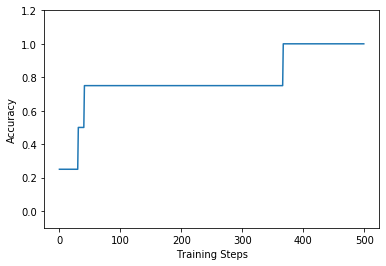

In [20]:
# Lastly let's plot the training progress.
import matplotlib.pyplot as plt
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()
# this graphs show how the accuracy improves as the interations increase. 

#### Train on XOR gate.

In [21]:
# Initialize a perceptron.
perceptron = Perceptron(2)
# Initialize list to store performance.
accuracies = []
steps =[]

# We train for 500 steps.
for i in range(500):
    steps.append(i)
    
    # 1. Draw a random sample from x and the corresponding t. Check 'np.random.randint'.
    index = np.random.randint(len(x))
    sample = x[index]
    label = t_xor[index]
    # 2. Perform a training step.
    perceptron.training_step(sample, label)
    
    # Calculate the performance over all four possible inputs.
    accuracy_sum = 0
    for k in range(4):
        output = perceptron.forward_step(x[k])   # feed each input to the perceptron (only foward step!)
        accuracy_sum += int(output == t_xor[k])  # this turns true if the perceptron gave the right output --> then adds 1 
    accuracy = accuracy_sum / 4                  # we divide through all the training examples
    accuracies.append(accuracy)

#### Visualize training progress.

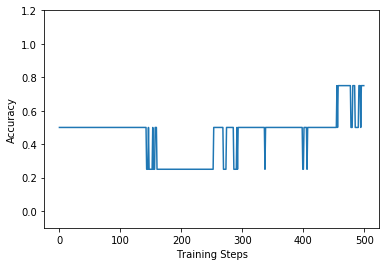

In [22]:
plt.figure()
plt.plot(steps, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.ylim([-0.1, 1.2])
plt.show()